## G4 프로젝트: Vocabulary Size를 변경해서 시도해 보기

In [69]:
from tensorflow.keras.datasets import reuters
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer

from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.naive_bayes import ComplementNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

from sklearn.metrics import f1_score

### 1. 모든 단어 사용

In [2]:
(x_train, y_train), (x_test, y_test) = reuters.load_data(num_words = None, test_split=0.2)

In [3]:
print('훈련 샘플의 수: {}'.format(len(x_train)))
print('테스트 샘플의 수: {}'.format(len(x_test)))

훈련 샘플의 수: 8982
테스트 샘플의 수: 2246


In [36]:
num_classes = max(y_train) + 1
print('클래스의 수 :{}'.format(num_classes))

클래스의 수 :46


In [5]:
word_index = reuters.get_word_index(path="reuters_word_index.json")

In [6]:
index_to_word = {index + 3 : word for word, index in word_index.items()}

In [7]:
for index, token in enumerate(("<pad>", "<sos>", "<unk>")):
    index_to_word[index] = token

In [8]:
decoded = []
for i in range(len(x_train)):
    t = ' '.join([index_to_word[index] for index in x_train[i]])
    decoded.append(t)
    
x_train = decoded

In [9]:
decoded = []
for i in range(len(x_test)):
    t = ' '.join([index_to_word[index] for index in x_test[i]])
    decoded.append(t)

x_test = decoded

In [10]:
x_train[:5]

['<sos> mcgrath rentcorp said as a result of its december acquisition of space co it expects earnings per share in 1987 of 1 15 to 1 30 dlrs per share up from 70 cts in 1986 the company said pretax net should rise to nine to 10 mln dlrs from six mln dlrs in 1986 and rental operation revenues to 19 to 22 mln dlrs from 12 5 mln dlrs it said cash flow per share this year should be 2 50 to three dlrs reuter 3',
 "<sos> generale de banque sa lt genb br and lt heller overseas corp of chicago have each taken 50 pct stakes in factoring company sa belgo factors generale de banque said in a statement it gave no financial details of the transaction sa belgo factors' turnover in 1986 was 17 5 billion belgian francs reuter 3",
 '<sos> shr 3 28 dlrs vs 22 cts shr diluted 2 99 dlrs vs 22 cts net 46 0 mln vs 3 328 000 avg shrs 14 0 mln vs 15 2 mln year shr 5 41 dlrs vs 1 56 dlrs shr diluted 4 94 dlrs vs 1 50 dlrs net 78 2 mln vs 25 9 mln avg shrs 14 5 mln vs 15 1 mln note earnings per share reflect th

In [11]:
x_test[:5]

['<sos> the great atlantic and pacific tea co said its three year 345 mln dlr capital program will be be substantially increased to accommodate growth and expansion plans for waldbaum inc and shopwell inc over the next two years a and p said the acquisition of shopwell in august 1986 and waldbaum in december helped us achieve better than expected results in the fourth quarter ended february 28 its net income from continuing operations jumped 52 6 pct to 20 7 mln dlrs or 55 cts a share in the latest quarter as sales increased 48 3 pct to 1 58 billion dlrs a and p gave no details on the expanded capital program but it did say it completed the first year of the program during 1986 a and p is 52 4 pct owned by lt tengelmann warenhandelsgesellschaft of west germany reuter 3',
 "<sos> philippine sugar production in the 1987 88 crop year ending august has been set at 1 6 mln tonnes up from a provisional 1 3 mln tonnes this year sugar regulatory administration sra chairman arsenio yulo said yu

In [13]:
dtmvector = CountVectorizer()
x_train_dtm = dtmvector.fit_transform(x_train)
print(x_train_dtm.shape)

(8982, 26506)


In [14]:
tfidf_transformer = TfidfTransformer()
tfidfv = tfidf_transformer.fit_transform(x_train_dtm)
print(tfidfv.shape)

(8982, 26506)


In [16]:
mod = MultinomialNB()
mod.fit(tfidfv, y_train)

MultinomialNB()

In [17]:
x_test_dtm = dtmvector.transform(x_test)
tfidfv_test = tfidf_transformer.transform(x_test_dtm)

predicted = mod.predict(tfidfv_test)
print("정확도:", accuracy_score(y_test, predicted))

정확도: 0.5997328584149599


(cf.) 10000개 정확도 : 0.6567230632235085

In [19]:
print(classification_report(y_test, mod.predict(tfidfv_test)))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        12
           1       0.79      0.21      0.33       105
           2       0.00      0.00      0.00        20
           3       0.72      0.92      0.81       813
           4       0.45      0.96      0.61       474
           5       0.00      0.00      0.00         5
           6       0.00      0.00      0.00        14
           7       0.00      0.00      0.00         3
           8       0.00      0.00      0.00        38
           9       0.00      0.00      0.00        25
          10       0.00      0.00      0.00        30
          11       0.80      0.29      0.42        83
          12       0.00      0.00      0.00        13
          13       0.00      0.00      0.00        37
          14       0.00      0.00      0.00         2
          15       0.00      0.00      0.00         9
          16       0.75      0.18      0.29        99
          17       0.00    

/home/aiffel/anaconda3/envs/aiffel/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


- 10000개의 경우:

 accuracy                           0.66      2246
 
   macro avg       0.17      0.10      0.10      2246
   
weighted avg       0.59      0.66      0.58      2246

In [20]:
def graph_confusion_matrix(model, x_test, y_test):
    df_cm = pd.DataFrame(confusion_matrix(y_test, model.predict(x_test)))
    fig = plt.figure(figsize=(15, 15))
    heatmap = sns.heatmap(df_cm, annot=True, fmt="d")
    heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=12)
    heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=45, ha = 'right', fontsize=12)
    plt.ylabel("label")
    plt.xlabel("predicted value")

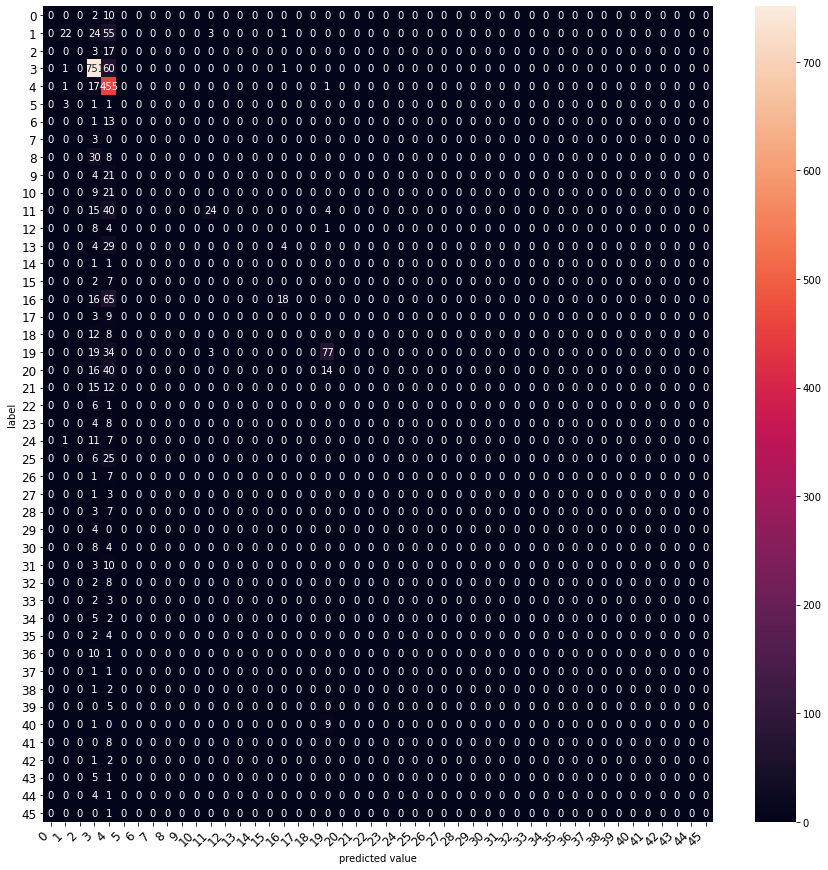

In [21]:
graph_confusion_matrix(mod, tfidfv_test, y_test)

In [22]:
cb = ComplementNB()
cb.fit(tfidfv, y_train)

ComplementNB()

In [23]:
predicted = cb.predict(tfidfv_test)
print("정확도: ", accuracy_score(y_test, predicted))

정확도:  0.7649154051647373


10000개의 경우:  0.7707034728406055

In [24]:
lr = LogisticRegression(C=10000, penalty='l2')
lr.fit(tfidfv, y_train)

/home/aiffel/anaconda3/envs/aiffel/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=10000)

In [25]:
predicted = lr.predict(tfidfv_test)
print("정확도: ", accuracy_score(y_test, predicted))

정확도:  0.813446126447017


10000개의 경우:  0.8076580587711487

In [26]:
lsvc = LinearSVC(C=1000, penalty='l1', max_iter=500, dual=False)
lsvc.fit(tfidfv, y_train)

/home/aiffel/anaconda3/envs/aiffel/lib/python3.7/site-packages/sklearn/svm/_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


LinearSVC(C=1000, dual=False, max_iter=500, penalty='l1')

In [27]:
predicted = lsvc.predict(tfidfv_test)
print("정확도: ", accuracy_score(y_test, predicted))

정확도:  0.776046304541407


10000개의 경우: 0.7720391807658059

In [28]:
tree = DecisionTreeClassifier(max_depth=10, random_state=0)
tree.fit(tfidfv, y_train)

DecisionTreeClassifier(max_depth=10, random_state=0)

In [29]:
predicted = tree.predict(tfidfv_test)
print("정확도: ", accuracy_score(y_test, predicted))

정확도:  0.6211041852181657


10000개의 경우: 0.6202137132680321

In [30]:
forest = RandomForestClassifier(n_estimators=5, random_state=0)
forest.fit(tfidfv, y_train)

RandomForestClassifier(n_estimators=5, random_state=0)

In [31]:
predicted = forest.predict(tfidfv_test)
print("정확도: ", accuracy_score(y_test, predicted))

정확도:  0.6544968833481746


10000개의 경우: 0.674087266251113

In [32]:
grbt = GradientBoostingClassifier(random_state=0, verbose=3)
grbt.fit(tfidfv, y_train)

      Iter       Train Loss   Remaining Time 
         1       12845.1851           10.34m
         2   689466281.7264           10.17m
         3 6884613407215.1387           10.14m
         4 5935818824582923550720.0000           10.04m
         5 9040644020576697454476775298309462042959687372080133879675061827235923374847613060426279764553817024942513812241979907601155443654656.0000            9.97m
         6 9040644020576697454476775298309462042959687372080133879675061827235923374847613060426279764553817024942513812241979907601155443654656.0000            9.88m
         7 9040644020576697454476775298309462042959687372080133879675061827235923374847613060426279764553817024942513812241979907601155443654656.0000            9.82m
         8 9040644020576697454476775298309462042959687372080133879675061827235923374847613060426279764553817024942513812241979907601155443654656.0000            9.74m
         9 9040644020576697454476775298309462042959687372080133879675061827235923374847613060

        51 71276538223797627407516241100862978529530963044983872457904873785026599868454939389911852427245548475410496325767775571272401790294044479567429632.0000            5.78m
        52 71276538223797627407516241100862978529530963044983872457904873785026599868454939389911852427245548475410496325767775571272401790294044479567429632.0000            5.67m
        53 71276538223797627407516241100862978529530963044983872457904873785026599868454939389911852427245548475410496325767775571272401790294044479567429632.0000            5.55m
        54 71276538223797627407516241100862978529530963044983872457904873785026599868454939389911852427245548475410496325767775571272401790294044479567429632.0000            5.44m
        55 71276538223797627407516241100862978529530963044983872457904873785026599868454939389911852427245548475410496325767775571272401790294044479567429632.0000            5.32m
        56 71276538223797627407516241100862978529530963044983872457904873785026599868454939389911852

        97 71276538223797627407516241100862978529530963044983872457904873785026599868454939389911852427245548475410496325767775571272401790294044479567429632.0000           21.57s
        98 71276538223797627407516241100862978529530963044983872457904873785026599868454939389911852427245548475410496325767775571272401790294044479567429632.0000           14.38s
        99 71276538223797627407516241100862978529530963044983872457904873785026599868454939389911852427245548475410496325767775571272401790294044479567429632.0000            7.19s
       100 71276538223797627407516241100862978529530963044983872457904873785026599868454939389911852427245548475410496325767775571272401790294044479567429632.0000            0.00s


GradientBoostingClassifier(random_state=0, verbose=3)

In [33]:
predicted = grbt.predict(tfidfv_test)
print("정확도: ", accuracy_score(y_test, predicted))

정확도:  0.7702582368655387


10000개의 경우: 0.7666963490650045

In [34]:
voting_classifier = VotingClassifier(estimators =[
    ('lr', LogisticRegression(C=10000, penalty='l2')),
    ('cb', ComplementNB()),
    ('grbt', GradientBoostingClassifier(random_state=0))
], voting='soft', n_jobs=-1)
voting_classifier.fit(tfidfv, y_train)

VotingClassifier(estimators=[('lr', LogisticRegression(C=10000)),
                             ('cb', ComplementNB()),
                             ('grbt',
                              GradientBoostingClassifier(random_state=0))],
                 n_jobs=-1, voting='soft')

In [35]:
predicted = voting_classifier.predict(tfidfv_test)
print("정확도: ", accuracy_score(y_test, predicted))

정확도:  0.8187889581478184


10000개의 경우: 0.8116651825467498

- 모든 단어를 사용하는 경우와 10,000개의 단어만 사용하는 경우 모델에 따라 성능이 개선되기도 하고 나빠지기도 하여 유의미한 차이를 보이지 않음

### 2. 빈도수 상위 5,000개의 단어만 사용

In [37]:
(x_train, y_train), (x_test, y_test) = reuters.load_data(num_words = 5000, test_split=0.2)

In [38]:
print('훈련 샘플의 수: {}'.format(len(x_train)))
print('테스트 샘플의 수: {}'.format(len(x_test)))

훈련 샘플의 수: 8982
테스트 샘플의 수: 2246


In [39]:
num_classes = max(y_train) + 1
print('클래스의 수 :{}'.format(num_classes))

클래스의 수 :46


In [40]:
word_index = reuters.get_word_index(path="reuters_word_index.json")

In [41]:
index_to_word = {index + 3 : word for word, index in word_index.items()}

In [42]:
for index, token in enumerate(("<pad>", "<sos>", "<unk>")):
    index_to_word[index] = token

In [43]:
decoded = []
for i in range(len(x_train)):
    t = ' '.join([index_to_word[index] for index in x_train[i]])
    decoded.append(t)
    
x_train = decoded

In [44]:
decoded = []
for i in range(len(x_test)):
    t = ' '.join([index_to_word[index] for index in x_test[i]])
    decoded.append(t)

x_test = decoded

In [45]:
x_train[:5]

['<sos> <unk> <unk> said as a result of its december acquisition of space co it expects earnings per share in 1987 of 1 15 to 1 30 dlrs per share up from 70 cts in 1986 the company said pretax net should rise to nine to 10 mln dlrs from six mln dlrs in 1986 and rental operation revenues to 19 to 22 mln dlrs from 12 5 mln dlrs it said cash flow per share this year should be 2 50 to three dlrs reuter 3',
 '<sos> generale de banque sa lt <unk> <unk> and lt heller overseas corp of chicago have each taken 50 pct stakes in <unk> company sa <unk> factors generale de banque said in a statement it gave no financial details of the transaction sa <unk> <unk> turnover in 1986 was 17 5 billion belgian francs reuter 3',
 '<sos> shr 3 28 dlrs vs 22 cts shr diluted 2 99 dlrs vs 22 cts net 46 0 mln vs 3 328 000 avg shrs 14 0 mln vs 15 2 mln year shr 5 41 dlrs vs 1 56 dlrs shr diluted 4 94 dlrs vs 1 50 dlrs net 78 2 mln vs 25 9 mln avg shrs 14 5 mln vs 15 1 mln note earnings per share reflect the two fo

In [46]:
x_test[:5]

['<sos> the great atlantic and pacific tea co said its three year 345 mln dlr capital program will be be substantially increased to <unk> growth and expansion plans for <unk> inc and <unk> inc over the next two years a and p said the acquisition of <unk> in august 1986 and <unk> in december helped us achieve better than expected results in the fourth quarter ended february 28 its net income from continuing operations jumped 52 6 pct to 20 7 mln dlrs or 55 cts a share in the latest quarter as sales increased 48 3 pct to 1 58 billion dlrs a and p gave no details on the expanded capital program but it did say it completed the first year of the program during 1986 a and p is 52 4 pct owned by lt <unk> <unk> of west germany reuter 3',
 "<sos> philippine sugar production in the 1987 88 crop year ending august has been set at 1 6 mln tonnes up from a provisional 1 3 mln tonnes this year sugar regulatory administration <unk> chairman <unk> <unk> said <unk> told reuters a survey during the curr

In [47]:
dtmvector = CountVectorizer()
x_train_dtm = dtmvector.fit_transform(x_train)
print(x_train_dtm.shape)

(8982, 4867)


In [48]:
tfidf_transformer = TfidfTransformer()
tfidfv = tfidf_transformer.fit_transform(x_train_dtm)
print(tfidfv.shape)

(8982, 4867)


In [49]:
mod = MultinomialNB()
mod.fit(tfidfv, y_train)

MultinomialNB()

In [50]:
x_test_dtm = dtmvector.transform(x_test)
tfidfv_test = tfidf_transformer.transform(x_test_dtm)

predicted = mod.predict(tfidfv_test)
print("정확도:", accuracy_score(y_test, predicted))

정확도: 0.6731967943009796


10000개의 경우:0.6567230632235085

In [51]:
print(classification_report(y_test, mod.predict(tfidfv_test)))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        12
           1       0.50      0.80      0.62       105
           2       0.00      0.00      0.00        20
           3       0.86      0.89      0.87       813
           4       0.59      0.95      0.73       474
           5       0.00      0.00      0.00         5
           6       0.00      0.00      0.00        14
           7       0.00      0.00      0.00         3
           8       0.00      0.00      0.00        38
           9       1.00      0.28      0.44        25
          10       0.00      0.00      0.00        30
          11       0.48      0.73      0.58        83
          12       0.00      0.00      0.00        13
          13       1.00      0.14      0.24        37
          14       0.00      0.00      0.00         2
          15       0.00      0.00      0.00         9
          16       0.60      0.66      0.62        99
          17       0.00    

/home/aiffel/anaconda3/envs/aiffel/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


10000개의 경우:

accuracy                           0.66      2246

   macro avg       0.17      0.10      0.10      2246
   
weighted avg       0.59      0.66      0.58      2246

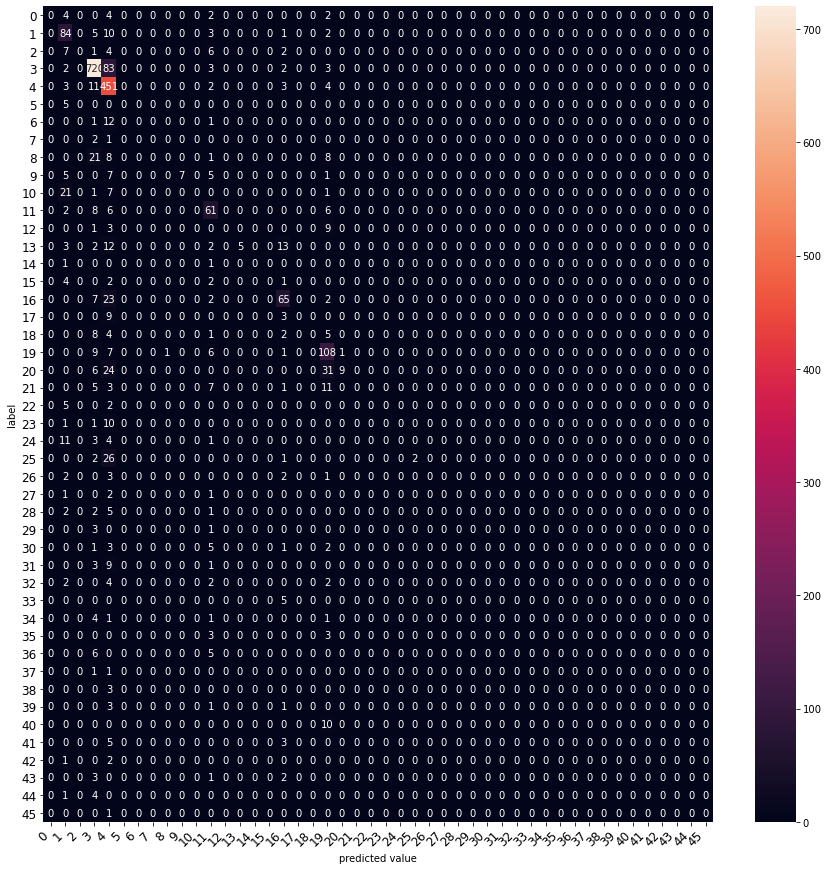

In [52]:
graph_confusion_matrix(mod, tfidfv_test, y_test)

In [53]:
cb = ComplementNB()
cb.fit(tfidfv, y_train)

ComplementNB()

In [54]:
predicted = cb.predict(tfidfv_test)
print("정확도: ", accuracy_score(y_test, predicted))

정확도:  0.7707034728406055


10000개의 경우: 0.7707034728406055

In [55]:
lr = LogisticRegression(C=10000, penalty='l2')
lr.fit(tfidfv, y_train)

/home/aiffel/anaconda3/envs/aiffel/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=10000)

In [56]:
predicted = lr.predict(tfidfv_test)
print("정확도: ", accuracy_score(y_test, predicted))

정확도:  0.8058771148708815


10000개의 경우:0.8076580587711487

In [57]:
lsvc = LinearSVC(C=1000, penalty='l1', max_iter=500, dual=False)
lsvc.fit(tfidfv, y_train)

/home/aiffel/anaconda3/envs/aiffel/lib/python3.7/site-packages/sklearn/svm/_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


LinearSVC(C=1000, dual=False, max_iter=500, penalty='l1')

In [58]:
predicted = lsvc.predict(tfidfv_test)
print("정확도: ", accuracy_score(y_test, predicted))

정확도:  0.7720391807658059


10000개의 경우 정확도: 0.7720391807658059

In [59]:
tree = DecisionTreeClassifier(max_depth=10, random_state=0)
tree.fit(tfidfv, y_train)

DecisionTreeClassifier(max_depth=10, random_state=0)

In [60]:
predicted = tree.predict(tfidfv_test)
print("정확도: ", accuracy_score(y_test, predicted))

정확도:  0.6179875333926982


10000개의 경우 정확도: 0.6202137132680321

In [61]:
forest = RandomForestClassifier(n_estimators=5, random_state=0)
forest.fit(tfidfv, y_train)

RandomForestClassifier(n_estimators=5, random_state=0)

In [62]:
predicted = forest.predict(tfidfv_test)
print("정확도: ", accuracy_score(y_test, predicted))

정확도:  0.701246660730187


10000개의 경우 정확도: 0.674087266251113

In [63]:
grbt = GradientBoostingClassifier(random_state=0, verbose=3)
grbt.fit(tfidfv, y_train)

      Iter       Train Loss   Remaining Time 
         1       13200.9090           10.63m
         2 19141531432.3860           10.54m
         3 1018136056482137345428864037762575643679300980036667356656533462569269067776.0000           10.29m
         4 5793438208146438552371750463374243580454084126740516228669142075250525372030044080110043136.0000           10.09m
         5 3979630484381169793867261128601856110593550227404752540847489843154493525639763256294740889013872088305157670725524817116093080321688237768704.0000            9.93m
         6 3979630484381169793867261128601856110593550227404752540847489843154493525639763256294740889013872088305157670725524817116093080321688237768704.0000            9.79m
         7 3979630484381169793867261128601856110593550227404752540847489843154493525639763256294740889013872088305157670725524817116093080321688237768704.0000            9.65m
         8 397963048438116979386726112860185611059355022740475254084748984315449352563976325629474088

        50 3979630484381173178473821334674682744399927355192476462279466620274336263041595061252392018927962713273915122067783236783098648441282755559424.0000            5.18m
        51 3979630484381173178473821334674682744399927355192476462279466620274336263041595061252392018927962713273915122067783236783098648441282755559424.0000            5.08m
        52 3979630484381173178473821334674682744399927355192476462279466620274336263041595061252392018927962713273915122067783236783098648441282755559424.0000            4.97m
        53 3979630484381173178473821334674682744399927355192476462279466620274336263041595061252392018927962713273915122067783236783098648441282755559424.0000            4.87m
        54 3979630484381173178473821334674682744399927355192476462279466620274336263041595061252392018927962713273915122067783236783098648441282755559424.0000            4.77m
        55 3979630484381173178473821334674682744399927355192476462279466620274336263041595061252392018927962713273915122

        97 3979630484381173178473821334674682744399927355192476462279466620274336263041595061252392018927962713273915122067783236783098648441282755559424.0000           18.96s
        98 3979630484381173178473821334674682744399927355192476462279466620274336263041595061252392018927962713273915122067783236783098648441282755559424.0000           12.64s
        99 3979630484381173178473821334674682744399927355192476462279466620274336263041595061252392018927962713273915122067783236783098648441282755559424.0000            6.32s
       100 3979630484381173178473821334674682744399927355192476462279466620274336263041595061252392018927962713273915122067783236783098648441282755559424.0000            0.00s


GradientBoostingClassifier(random_state=0, verbose=3)

In [64]:
predicted = grbt.predict(tfidfv_test)
print("정확도: ", accuracy_score(y_test, predicted))
print("f1 score: ", f1_score(y_test, predicted, average='micro'))

정확도:  0.767586821015138


10000개의 경우 정확도: 0.7666963490650045

In [65]:
voting_classifier = VotingClassifier(estimators =[
    ('lr', LogisticRegression(C=10000, penalty='l2')),
    ('cb', ComplementNB()),
    ('grbt', GradientBoostingClassifier(random_state=0))
], voting='soft', n_jobs=-1)
voting_classifier.fit(tfidfv, y_train)

VotingClassifier(estimators=[('lr', LogisticRegression(C=10000)),
                             ('cb', ComplementNB()),
                             ('grbt',
                              GradientBoostingClassifier(random_state=0))],
                 n_jobs=-1, voting='soft')

In [68]:
from sklearn.metrics import f1_score

predicted = voting_classifier.predict(tfidfv_test)
print("정확도: ", accuracy_score(y_test, predicted))
print("f1 score: ", f1_score(y_test, predicted, average='micro'))

정확도:  0.8161175422974176
f1 score:  0.8161175422974176


10000개의 경우 정확도: 0.8116651825467498

- 8개의 모델중에는 Voting classsifier가 가장 성능이 우수하며, 전체 단어를 사용했을 때가 가장 높은 정확도를 보였다 (약 81.8%)

### 3. 딥러닝 모델과 비교해 보기

In [77]:
from tensorflow import keras
import numpy as np

In [70]:
(x_train, y_train), (x_test, y_test) = reuters.load_data(num_words = 10000, test_split=0.2)

In [71]:
# validation set 1800건 분리
x_val = x_train[:1800]   
y_val = y_train[:1800]

# validation set을 제외한 나머지
partial_x_train = x_train[1800:]  
partial_y_train = y_train[1800:]

In [75]:
vocab_size = 10000  # 어휘 사전의 크기입니다(10개의 단어)
word_vector_dim = 100  

model = keras.Sequential()
model.add(keras.layers.Embedding(vocab_size, word_vector_dim, input_shape=(None,)))
model.add(keras.layers.LSTM(128))   # 가장 널리 쓰이는 RNN인 LSTM 레이어를 사용하였습니다. 이때 LSTM state 벡터의 차원수는 8로 하였습니다. (변경가능)
model.add(keras.layers.Dense(8, activation='relu'))
model.add(keras.layers.Dense(1, activation='sigmoid'))  # 최종 출력은 긍정/부정을 나타내는 1dim 입니다.

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, None, 100)         1000000   
_________________________________________________________________
lstm (LSTM)                  (None, 128)               117248    
_________________________________________________________________
dense (Dense)                (None, 8)                 1032      
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 9         
Total params: 1,118,289
Trainable params: 1,118,289
Non-trainable params: 0
_________________________________________________________________


In [78]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
              
epochs=20  # 몇 epoch를 훈련하면 좋을지 결과를 보면서 바꾸어 봅시다. 

history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=epochs,
                    batch_size=512,
                    validation_data=(x_val, y_val),
                    verbose=1)

ValueError: Failed to convert a NumPy array to a Tensor (Unsupported object type list).

In [ ]:
# Model 1
vocab_size = 10000  # 어휘 사전의 크기입니다(10개의 단어)
word_vector_dim = 100  

model = keras.Sequential()
model.add(keras.layers.Embedding(vocab_size, word_vector_dim, input_shape=(None,)))
model.add(keras.layers.LSTM(128))   # 가장 널리 쓰이는 RNN인 LSTM 레이어를 사용하였습니다. 이때 LSTM state 벡터의 차원수는 8로 하였습니다. (변경가능)
model.add(keras.layers.Dense(8, activation='relu'))
model.add(keras.layers.Dense(1, activation='sigmoid'))  # 최종 출력은 긍정/부정을 나타내는 1dim 입니다.

model.summary()